#### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The Objective is to predict based on diagnostic measurements whether a patient has diabetes. A Random Forest model will be built.

##### Variables.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

+ Pregnancies: Number of times pregnant
+ Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ BloodPressure: Diastolic blood pressure (mm Hg)
+ SkinThickness: Triceps skin fold thickness (mm)
+ Insulin: 2-Hour serum insulin (mu U/ml)
+ BMI: Body mass index (weight in kg/(height in m)^2)
+ DiabetesPedigreeFunction: Diabetes pedigree function
+ Age: Age (years)
+ Outcome: Class variable (0 or 1)

---
Importing necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.utils import resample

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


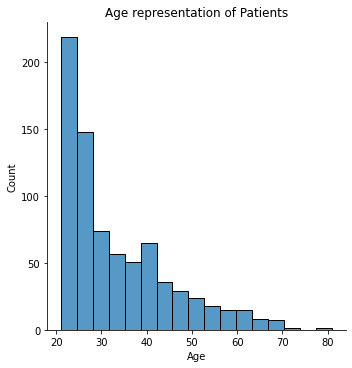

In [5]:
sns.displot(data = df, x = df.Age)
plt.title('Age representation of Patients')
plt.show()

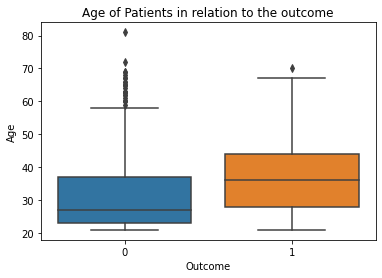

In [6]:
sns.boxplot( x=df["Outcome"], y=df["Age"] )
plt.title('Age of Patients in relation to the outcome')
plt.show()

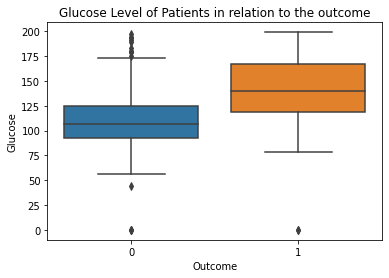

In [7]:
sns.boxplot(x=df["Outcome"], y=df["Glucose"])
plt.title('Glucose Level of Patients in relation to the outcome')
plt.show()

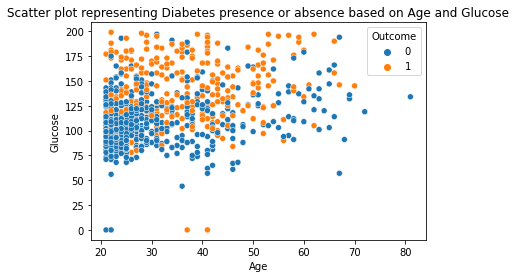

In [8]:
sns.scatterplot(data = df, x = df.Age, y = df.Glucose, hue = df.Outcome)
plt.title('Scatter plot representing Diabetes presence or absence based on Age and Glucose')
plt.show()

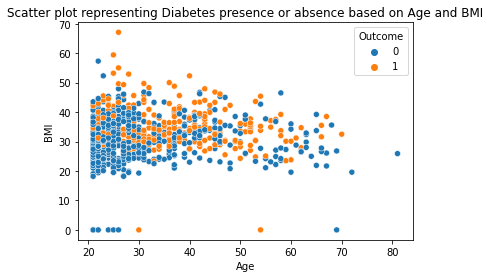

In [9]:
sns.scatterplot(data = df, x = df.Age, y = df.BMI, hue = df.Outcome)
plt.title('Scatter plot representing Diabetes presence or absence based on Age and BMI')
plt.show()

##### Data Balancing.

A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples. Using sckit learn resample, the variable "Outcome" will be balanced to have equal outputs.



In [10]:
sample1 = df[df['Outcome'] == 1]

In [11]:
sample2 = df[df['Outcome'] == 0]

In [12]:
len(sample1)

268

In [13]:
len(sample2)

500

In [14]:
sample1_resample = resample(sample1, replace = True, n_samples=500, random_state=42)

In [15]:
df2 = pd.concat([sample2,sample1_resample])

Sample 1 (Outcome 0, Diabetes absent) was originally 268. It was resampled to 500, similar to Sample 2 (Outcome 1, Diabetes present)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 425
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [17]:
print(df2['Outcome'].value_counts())

0    500
1    500
Name: Outcome, dtype: int64


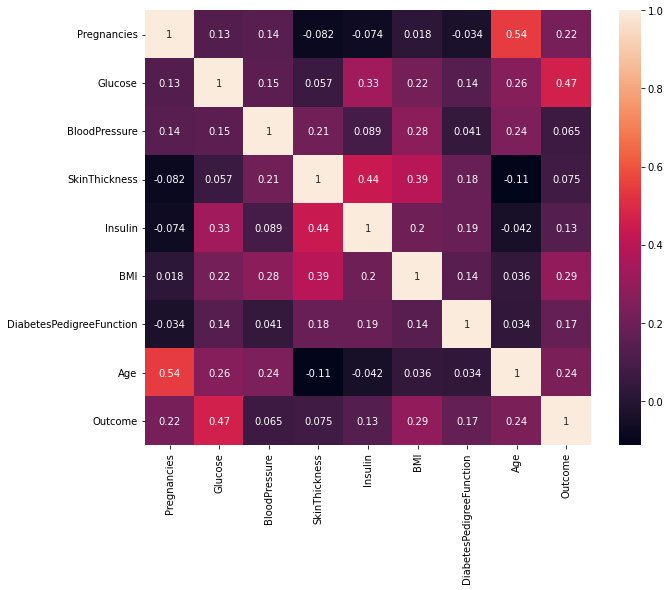

In [18]:
coor = df2.corr()
features = coor.index
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df[features].corr(), annot = True)

The correlation matrix shows that 
+ Age has 54% correlation to Pregnancies, this means the older a person, the more children they are likely to have.
+ Glucose has 47% correlation to the possibility of having diabetes.


Splitting DataSet

In [19]:
X = df2.drop('Outcome', axis = 1)
y = df2['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0, shuffle = True)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 0) # 30 trees, data split options
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [23]:

#Testing accuracy
classifier.score(X_test, y_test)

0.848

In [24]:
#training accuracy
classifier.score(X_train, y_train)

0.9986666666666667

In [25]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [26]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) 
print(cm)
accuracy_score(y_test, y_pred)

[[ 93  28]
 [ 10 119]]


0.848

In [28]:
class_report = classification_report(y_test, y_pred)

In [29]:
print('Classification report: \n{}'.format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       121
           1       0.81      0.92      0.86       129

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



According to the classification report, outcome (0) is 77% accurate with a 90% precision. This indicates that it correctly predicted diabetes absence 90% of the time, of which 77% were correct. Outcome 1 has a 92% recall but an 81% precision. This indicates that whenever the model was to make a prediction, there was a larger likelihood of predicting diabetes present more accurately than its absence. The F1 score is 85%

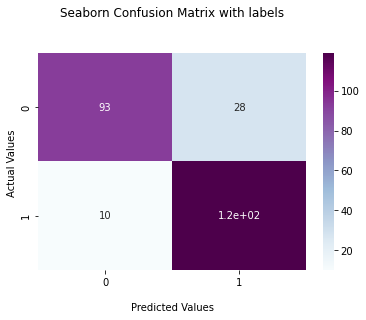

In [30]:
ax = sns.heatmap(cm, annot=True, cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Hyper-Parameter Tuning

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for the Random Forest algorithm while applying this optimized algorithm to the data.

In [31]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [32]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [33]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [34]:
grid_search.best_score_

0.8400628626692456

In [35]:
# Best parameters for to get the most accuracy
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

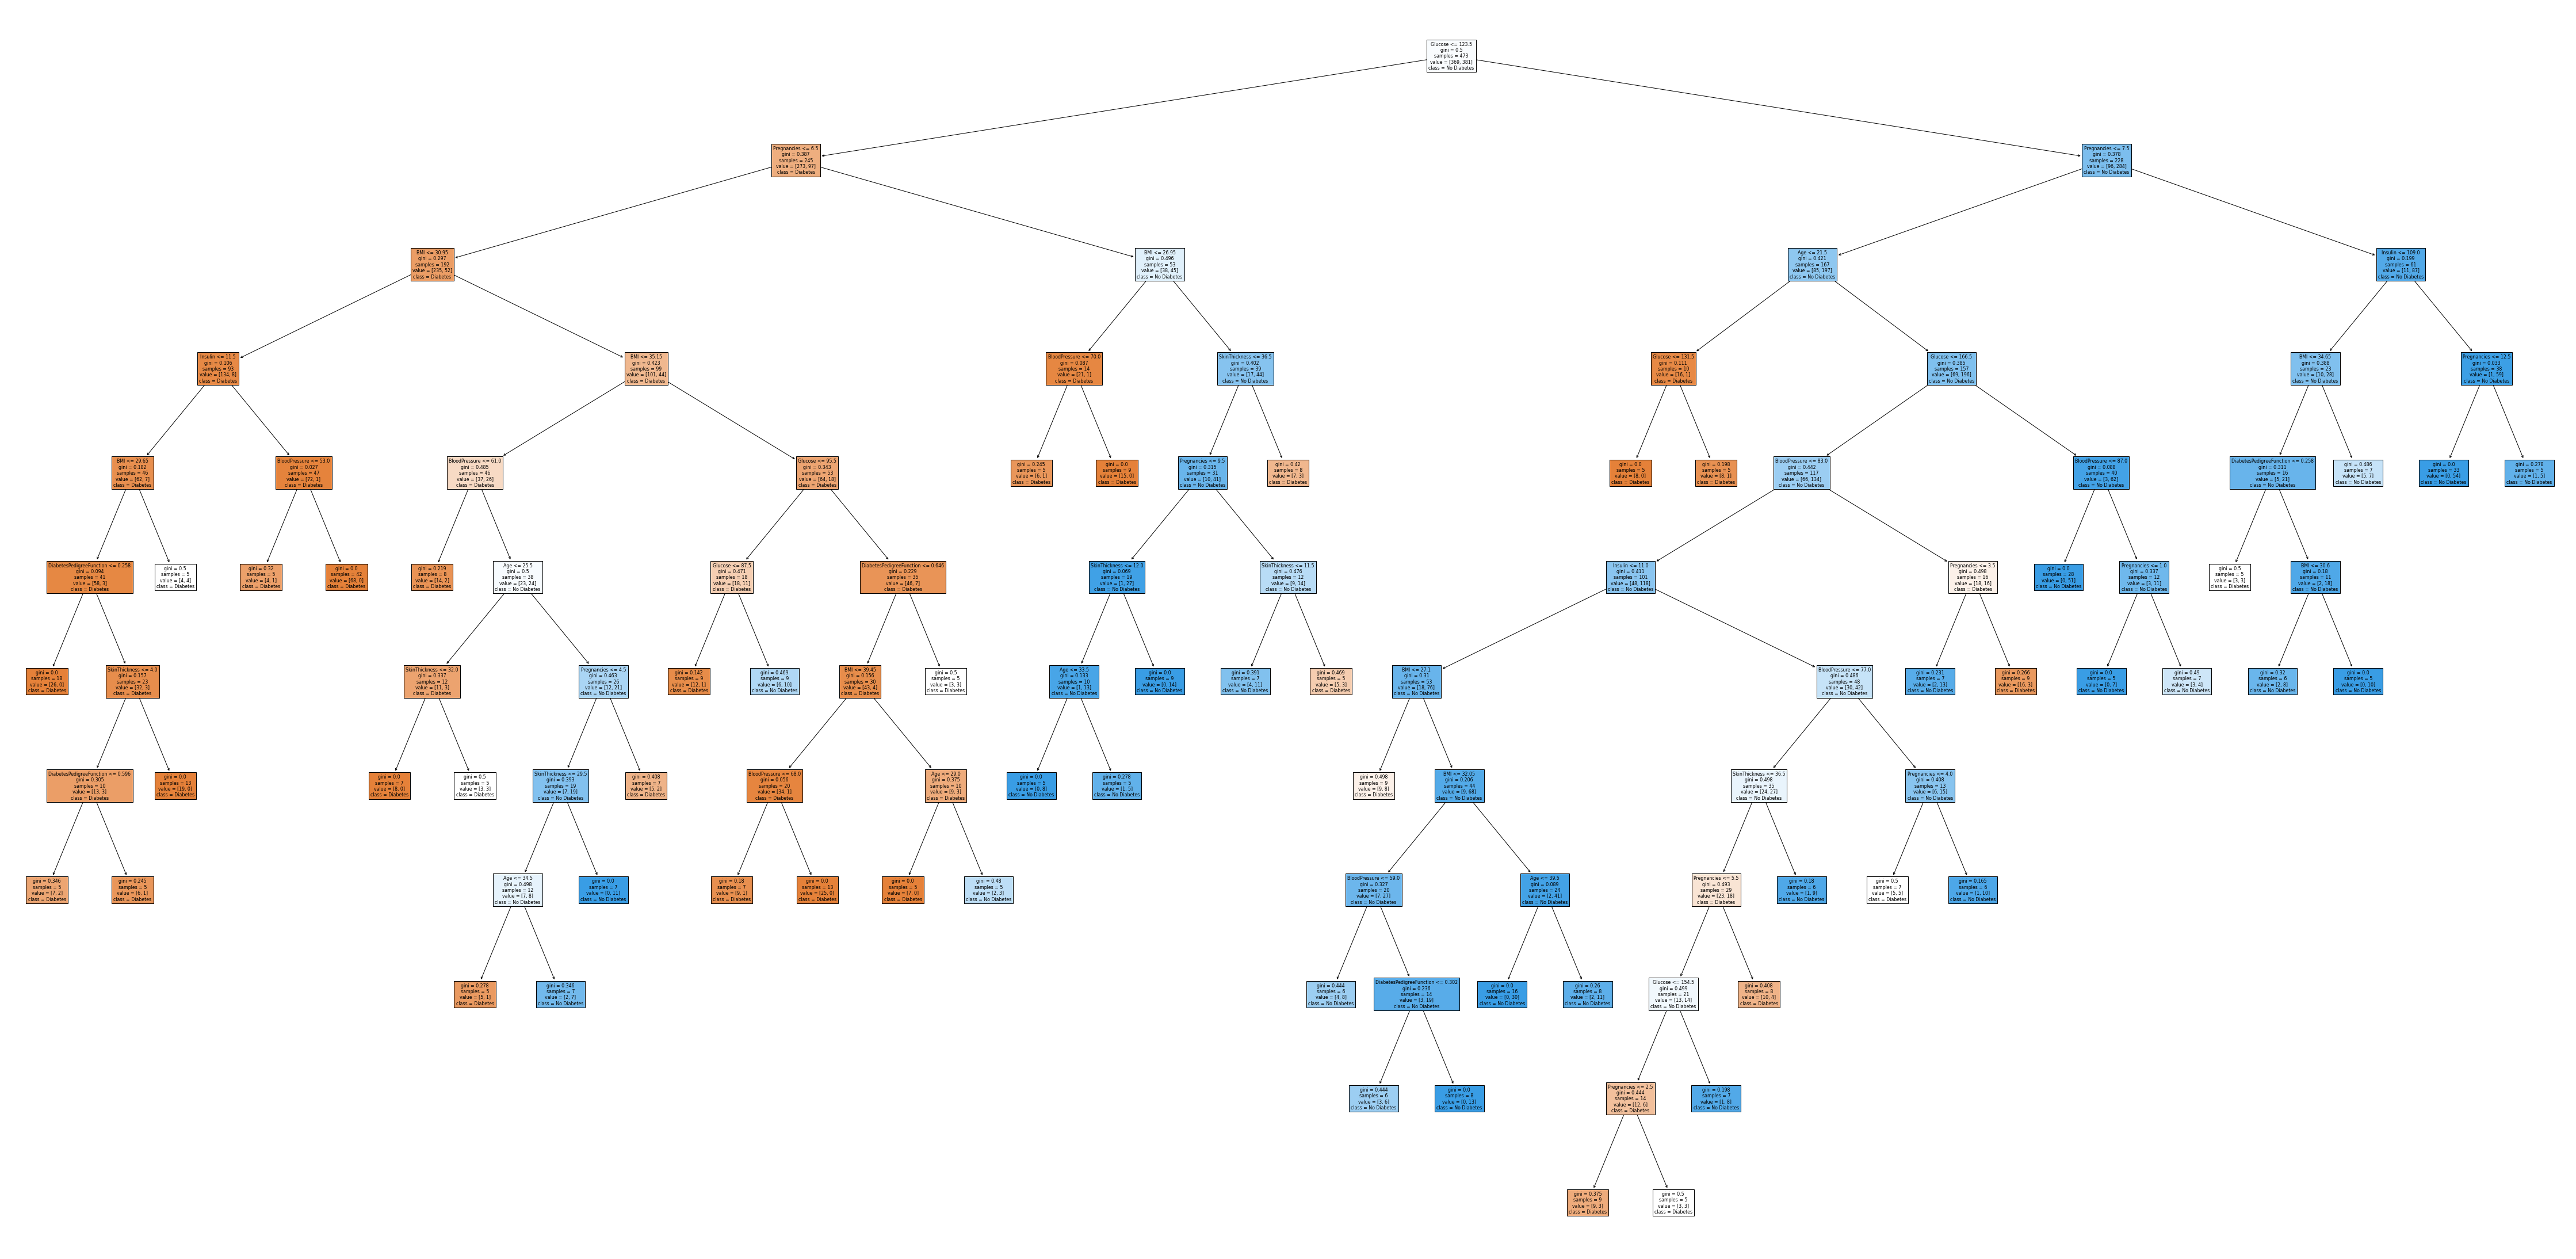

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);

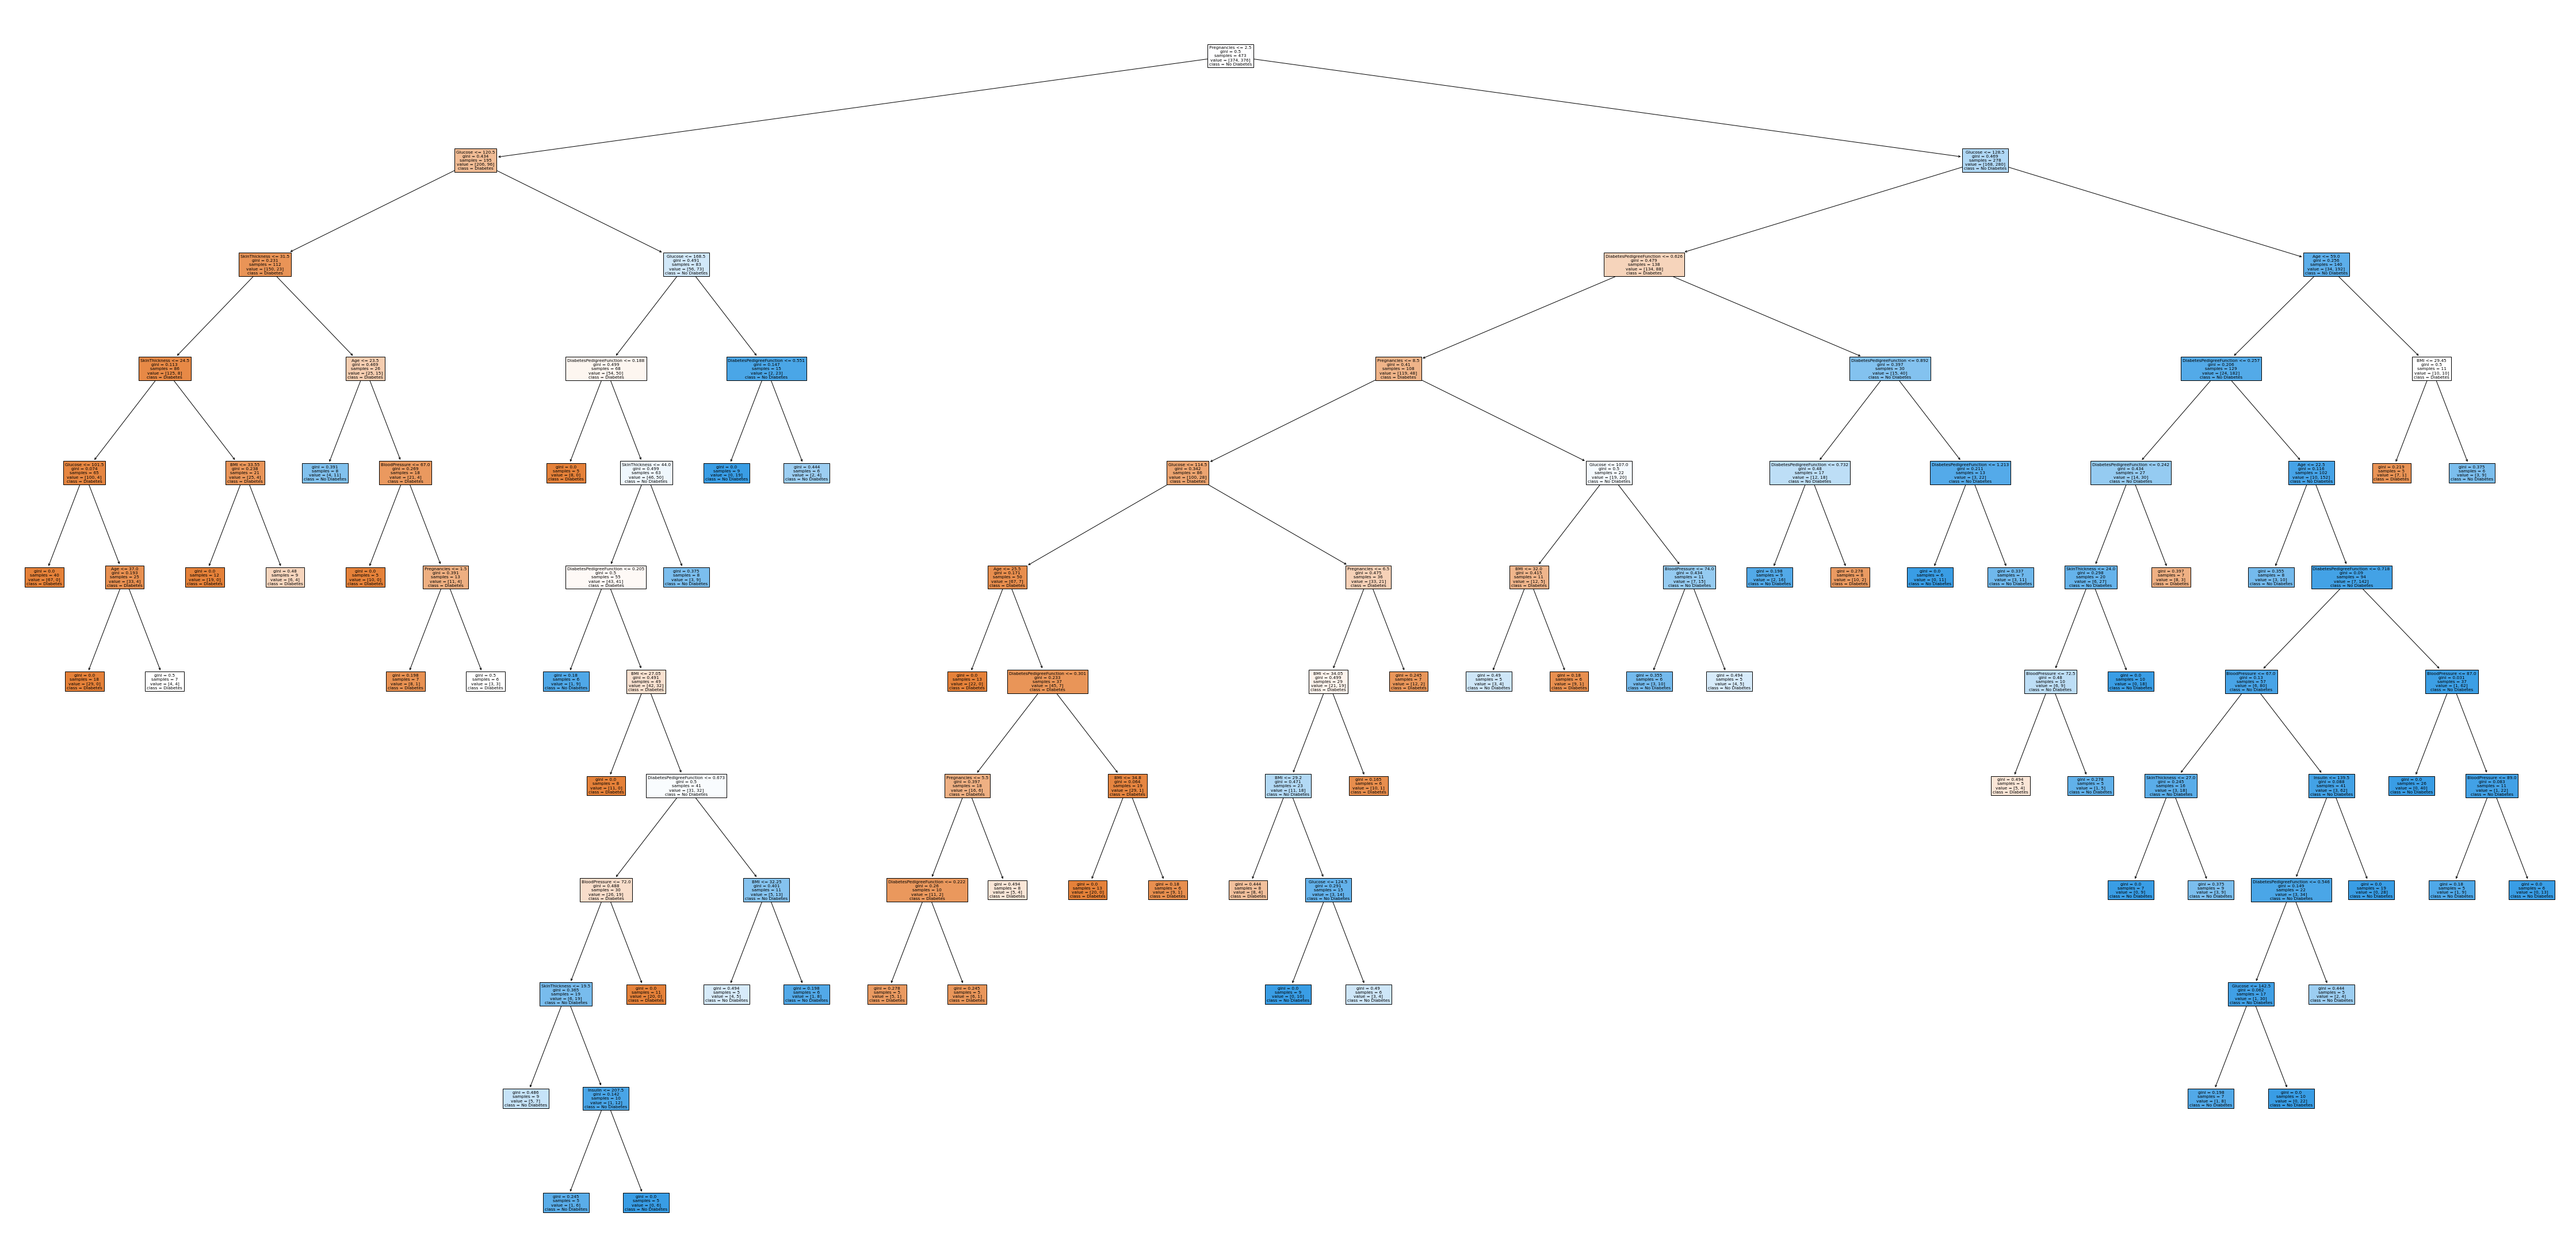

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);

In [38]:
rf_best.feature_importances_

array([0.08940136, 0.30986603, 0.07709489, 0.05759916, 0.05893081,
       0.17833783, 0.08229777, 0.14647215])

In [39]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})


In [40]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Glucose,0.309866
5,BMI,0.178338
7,Age,0.146472
0,Pregnancies,0.089401
6,DiabetesPedigreeFunction,0.082298
2,BloodPressure,0.077095
4,Insulin,0.058931
3,SkinThickness,0.057599


A patients glucose level, BMI and Age are the most considerable factors in determining diabetes in a patient. 